## **Library**

In [1]:
import os
import shutil
import zipfile

import random
from shutil import move

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, GlobalMaxPool2D, AvgPool2D, GlobalAvgPool2D, BatchNormalization, Dropout

from keras.utils.vis_utils import plot_model
from PIL import Image

## **Cek Data**

In [2]:
#tanpa preprocessing
base_dataset = 'D:/Rifal/Dataset/Raw/STAD/'

# preprocessing
# base_dataset = 'D:/Rifal/Dataset/Preprocessing/CRC/'

msi = base_dataset+'MSIMUT'
mss = base_dataset+'MSS'

trainMSI = os.listdir(msi)
trainMSS = os.listdir(mss)
print("Total Data Train MSI   :",len(trainMSI))
print("Total Data Train MSS   :",len(trainMSS))

print("\n")

print("Nama File MSI          :",trainMSI[:1])
print("Nama File MSS          :",trainMSS[:1])

Total Data Train MSI   : 50285
Total Data Train MSS   : 50285


Nama File MSI          : ['blk-AAAAQLQYEQED-TCGA-D7-A4YV-01Z-00-DX1.png']
Nama File MSS          : ['blk-AAAAEHNFIMQT-TCGA-HU-A4H6-01Z-00-DX1.png']


## **Split Data**

In [3]:
# !pip install split-folders
# import splitfolders

# splitfolders.ratio('D:/Rifal/Dataset/Preprocessing/CRC/', output='D:/Rifal/Preprocessing/CRC/',
#                    seed=1308, ratio=(.8, .2), group_prefix=None)

## **Cek Data**

In [4]:
# tanpa preprocessing
base_dataset = 'D:/Rifal/Dataset/STAD/'

#preprocessing
# base_dataset = 'D:/Rifal/Preprocessing/CRC/'

train_dir = base_dataset+'train'
# test_dir = base_dataset+'test'
val_dir = base_dataset+'val'

In [5]:
trainMSI = os.listdir(train_dir+"/MSIMUT")
trainMSS = os.listdir(train_dir+"/MSS")
print("Total Data Train MSI   : ",len(trainMSI))
print("Total Data Train MSS   : ",len(trainMSS))

print("")
valMSI = os.listdir(val_dir+"/MSIMUT")
valMSS = os.listdir(val_dir+"/MSS")
print("Total Data Val MSI   : ",len(valMSI))
print("Total Data Val MSS   : ",len(valMSS))

train_length = len(trainMSI) + len(trainMSS)
val_length = len(valMSI) + len(valMSS)

# print("")
# testMSI = os.listdir(test_dir+"/MSIMUT")
# testMSS = os.listdir(test_dir+"/MSS")
# print("Total Data Test MSI   : ",len(testMSI))
# print("Total Data Test MSS   : ",len(testMSS))

Total Data Train MSI   :  40228
Total Data Train MSS   :  40228

Total Data Val MSI   :  10057
Total Data Val MSS   :  10057


## **Preprocessing Data**

In [6]:
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 180,
                    horizontal_flip = True,
                    vertical_flip = True,
                    zoom_range = 0.1,
                    width_shift_range = 0.1,
                    height_shift_range = 0.1,
                    fill_mode = 'reflect')

val_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 180,
                    horizontal_flip = True,
                    vertical_flip = True,
                    zoom_range = 0.1,
                    width_shift_range = 0.1,
                    height_shift_range = 0.1,
                    fill_mode = 'reflect')

In [7]:
batch_size = 32

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (224, 224),
        batch_size = batch_size,
        class_mode = 'binary')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size = (224, 224),
        batch_size = batch_size,
#         shuffle=False,
        class_mode = 'binary')

Found 80456 images belonging to 2 classes.
Found 20114 images belonging to 2 classes.


## Skenario 3 Model VGG19 Lite + Augmentasi Tanpa DAPL

In [8]:
import tensorflow as tf

In [9]:
# Model Scenario Kedua
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D((2,2), padding='same'),
    
    tf.keras.layers.Conv2D(128, (3,3), strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D((2,2), padding='same'),
    
    tf.keras.layers.Conv2D(256, (3,3), strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D((2,2), padding='same'),
    tf.keras.layers.Conv2D(256, (3,3), strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D((2,2), padding='same'),
    
    tf.keras.layers.Conv2D(512, (3,3), strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D((2,2), padding='same'),
    tf.keras.layers.Conv2D(512, (3,3), strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D((2,2), padding='same'),
    tf.keras.layers.Conv2D(512, (3,3), strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D((2,2), padding='same'),
    tf.keras.layers.Conv2D(512, (3,3), strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D((2,2), padding='same'),
    
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau

model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.SGD(lr=0.0001),
              metrics=['accuracy'])



EarlyStop = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0, 
    patience=4, 
    verbose=1,
    mode='auto', 
    baseline=None, 
    restore_best_weights=True
)


filepath = '/Rifal/Model/STAD/Evaluate/100%_STAD_Evaluate2.h5'

CheckPoint = ModelCheckpoint(
    filepath=filepath, 
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='auto'
)


# initial_lrate = 0.0001
# def time_decay(epoch, initial_lrate):
#     decay_rate = 0.00001
#     new_lrate = initial_lrate/(1+decay_rate*epoch)
#     return new_lrate

# LRSD = LearningRateScheduler(time_decay,verbose=1)


def scheduler(epoch, lr):
    if (epoch < 15):
        return lr
    else:
        return lr * tf.math.exp(-0.04)

LRS = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose=1)


RLP = ReduceLROnPlateau(monitor='val_accuracy', 
                              mode='auto',
                              factor=0.6,
                              patience=2, 
                              min_lr=0.00001,
                              cooldown=2,
                              verbose=1)

callback = [
    CheckPoint,
    EarlyStop,
#     LRSD,
    LRS,
    RLP
] 


In [11]:
import time

start = time.time()
history = model.fit(
      train_generator,
      steps_per_epoch = train_length // batch_size,
      epochs=50,
      validation_data = validation_generator,
      validation_steps = val_length // batch_size + 1,
      verbose=1,
      callbacks=[callback])
print("Total time: ", time.time() - start, "seconds")

Epoch 1/50

Epoch 00001: LearningRateScheduler reducing learning rate to 9.999999747378752e-05.
2514/2514 [==============================] - 2303s 912ms/step - loss: 0.6779 - accuracy: 0.5743 - val_loss: 0.6436 - val_accuracy: 0.6505

Epoch 00001: val_accuracy improved from -inf to 0.65049, saving model to /Rifal/Model/STAD/Evaluate\100%_STAD_Evaluate2.h5
Epoch 2/50

Epoch 00002: LearningRateScheduler reducing learning rate to 9.999999747378752e-05.
2514/2514 [==============================] - 800s 318ms/step - loss: 0.6422 - accuracy: 0.6459 - val_loss: 0.6183 - val_accuracy: 0.6741

Epoch 00002: val_accuracy improved from 0.65049 to 0.67406, saving model to /Rifal/Model/STAD/Evaluate\100%_STAD_Evaluate2.h5
Epoch 3/50

Epoch 00003: LearningRateScheduler reducing learning rate to 9.999999747378752e-05.
2514/2514 [==============================] - 956s 380ms/step - loss: 0.6200 - accuracy: 0.6702 - val_loss: 0.5978 - val_accuracy: 0.6952

Epoch 00003: val_accuracy improved from 0.67406 

2514/2514 [==============================] - 6518s 3s/step - loss: 0.4856 - accuracy: 0.7680 - val_loss: 0.4678 - val_accuracy: 0.7837

Epoch 00024: val_accuracy did not improve from 0.78398
Epoch 25/50

Epoch 00025: LearningRateScheduler reducing learning rate to tf.Tensor(8.687352e-06, shape=(), dtype=float32).
2514/2514 [==============================] - 6431s 3s/step - loss: 0.4830 - accuracy: 0.7698 - val_loss: 0.4687 - val_accuracy: 0.7825

Epoch 00025: val_accuracy did not improve from 0.78398
Epoch 26/50

Epoch 00026: LearningRateScheduler reducing learning rate to tf.Tensor(8.346717e-06, shape=(), dtype=float32).
2514/2514 [==============================] - 5740s 2s/step - loss: 0.4799 - accuracy: 0.7728 - val_loss: 0.4704 - val_accuracy: 0.7821

Epoch 00026: val_accuracy did not improve from 0.78398
Epoch 27/50

Epoch 00027: LearningRateScheduler reducing learning rate to tf.Tensor(8.019438e-06, shape=(), dtype=float32).
2514/2514 [==============================] - 5714s 2s/s

## **Evaluasi Model**

In [12]:
%cd D:/Rifal/Hasil/STAD/S0

D:\Rifal\Model\STAD


### **Plot Akurasi Loss**

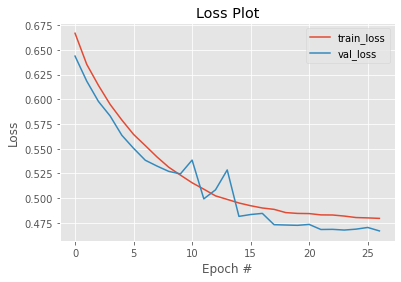

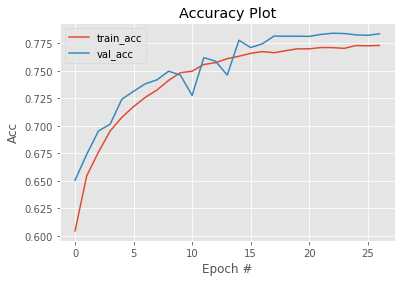

In [13]:
%matplotlib inline

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, len(history.history['val_accuracy'])), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, len(history.history['val_accuracy'])), history.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.savefig("100%_S0_LOSS.svg")
plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, len(history.history['val_accuracy'])), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, len(history.history['val_accuracy'])), history.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.savefig("100%_S0_ACC.svg")
plt.show()

### **Train**

In [11]:
result_train = model.evaluate(train_generator, verbose=1)
print('\n', 'Hasil Akurasi Train:-', result_train[1]," Hasil Loss Train", result_train[0])

2515/2515 [==============================] - 632s 250ms/step - loss: 0.4976 - accuracy: 0.7656

 Hasil Akurasi Train:- 0.7656483054161072  Hasil Loss Train 0.49758583307266235


### **Validasi**

In [12]:
result_val = model.evaluate(validation_generator, verbose=1)
print('\n', 'Hasil Akurasi Val:-', result_val[1]," Hasil Loss Val", result_val[0])

629/629 [==============================] - 173s 275ms/step - loss: 0.5021 - accuracy: 0.7638

 Hasil Akurasi Val:- 0.7637963891029358  Hasil Loss Val 0.5021129846572876


### **Confusion Matrix**

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

y_true_val = validation_generator.classes
y_pred = np.round(model.predict(validation_generator),0)

print('Confusion Matrix')
print(confusion_matrix(y_true_val, y_pred))

Confusion Matrix
[[7998 2059]
 [2690 7367]]


### **Classification Report**

In [14]:
print('Classification Report')

target_names = ['MSI', 'MSS']
print(classification_report(y_true_val, y_pred, target_names=target_names, zero_division=1))

Classification Report
              precision    recall  f1-score   support

         MSI       0.75      0.80      0.77     10057
         MSS       0.78      0.73      0.76     10057

    accuracy                           0.76     20114
   macro avg       0.76      0.76      0.76     20114
weighted avg       0.76      0.76      0.76     20114



### **AUC**

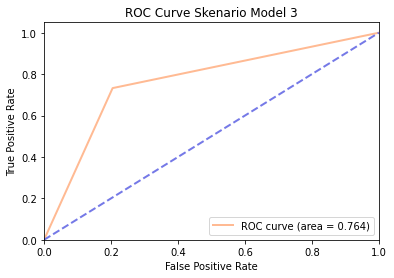

In [15]:
from sklearn.metrics import  precision_recall_curve, auc, roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_true_val, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='#ffba93',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#7579e7', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Skenario Model 3')
plt.legend(loc="lower right")
plt.savefig("100%_S0_AUC.svg")
plt.show()

In [16]:
auc_score = roc_auc_score(y_true_val, y_pred)
fpr, tpr, th = roc_curve(y_true_val, y_pred)
print('AUC Score Skenario Model 0 = ', round(auc_score, 3))

AUC Score Skenario Model 0 =  0.764


## **Save**

In [9]:
%cd D:/Rifal/Hasil/STAD/S0

D:\Rifal\Model\STAD\S0


In [14]:
from keras.models import load_model

#Save
model.save('100%_S0.h5')

In [10]:
from keras.models import load_model
model = load_model('100%_S0.h5')